### Setup

In [1]:
# install if not yet done
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
# Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

    Updating registry at `C:\Users\bergermann\.julia\registries\General.toml`
    Updating git-repo `https://github.com/mppmu/BoostFractor.jl.git`
    Updating git-repo `https://github.com/bergermann/Dragoon.jl.git`
   Installed InverseFunctions ─── v0.1.17
   Installed Accessors ────────── v0.1.38
   Installed SimpleBufferStream ─ v1.2.0
   Installed NearestNeighbors ─── v0.4.20
   Installed ConstructionBase ─── v1.5.8
   Installed SIMD ─────────────── v3.6.0
   Installed JLD2 ─────────────── v0.5.3
   Installed Roots ────────────── v2.2.1
   Installed LLVMOpenMP_jll ───── v18.1.7+0
   Installed OpenSSL_jll ──────── v3.0.15+1
    Updating `C:\Users\bergermann\.julia\environments\v1.9\Project.toml`
  [2528b1d8] ~ Dragoon v0.5.0 `https://github.com/bergermann/Dragoon.jl.git#main` ⇒ v0.5.0 `https://github.com/bergermann/Dragoon.jl.git#main`
  [033835bb] ↑ JLD2 v0.4.53 ⇒ v0.5.3
    Updating `C:\Users\bergermann\.julia\environments\v1.9\Manifest.toml`
  [7d9f7c33] ↑ Accessors v0.1.37 ⇒ v0.

In [38]:
using Dragoon
using Plots, Plots.Measures
using Dates

In [57]:
n = 20 # number of discs in the booster

cf = 10.025e9

initdist = findpeak1d(cf,n; granularity=10_000,deviation=0.3) # initial disc configuration

freqs = genFreqs(cf,50e6; n=10) # optimize on these frequencies
freqsplot = genFreqs(cf,150e6; n=1000) # plot with these frequencies

booster = AnalyticalBooster(initdist; ndisk=n)  # physical properties of the booster

obj = ObjAnalytical

hist = initHist(booster,2*(booster.ndisk^2),freqs,obj);

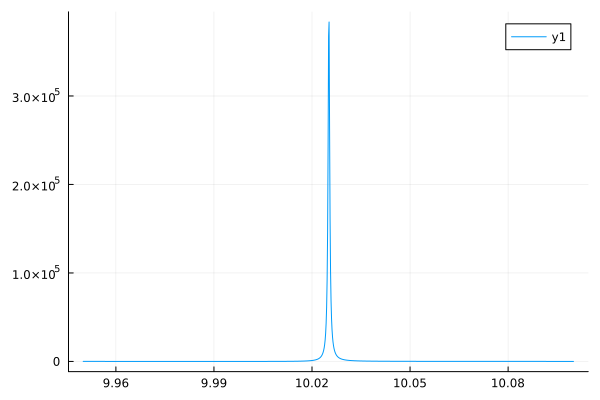

In [58]:
p0 = copy(booster.pos)

plot(freqsplot/1e9,getBoost1d(booster,freqsplot))

### Optimizer

In [55]:
trace = nelderMead(booster,hist,freqs,
                    1.,1+2/n,0.75-1/2n,1-1/n,1e-12,
                    obj,
                    InitSimplexRegular(1e-4),
                    DefaultSimplexSampler,
                    UnstuckDont;
                    maxiter=Int(1e6),
                    showtrace=true,
                    showevery=10000,
                    unstuckisiter=true,);

Iter: 10000, timestamp: 21 minutes, 51 seconds
Iter finished. Objective value: -4942.849

Iter: 20000, timestamp: 23 minutes, 46 seconds
Iter finished. Objective value: -5036.262

Iter: 30000, timestamp: 23 minutes, 51 seconds
Iter finished. Objective value: -5043.571

Iter: 40000, timestamp: 24 minutes, 5 seconds
Iter finished. Objective value: -5058.143

Iter: 50000, timestamp: 24 minutes, 15 seconds
Iter finished. Objective value: -5062.63

Iter: 60000, timestamp: 25 minutes, 9 seconds
Iter finished. Objective value: -5092.195

Iter: 70000, timestamp: 25 minutes, 15 seconds
Iter finished. Objective value: -5095.006

Iter: 80000, timestamp: 25 minutes, 18 seconds
Iter finished. Objective value: -5097.639

Iter: 90000, timestamp: 25 minutes, 19 seconds
Iter finished. Objective value: -5097.775

Iter: 100000, timestamp: 25 minutes, 20 seconds
Iter finished. Objective value: -5099.152

Iter: 110000, timestamp: 25 minutes, 20 seconds
Iter finished. Objective value: -5099.331

Iter: 12000

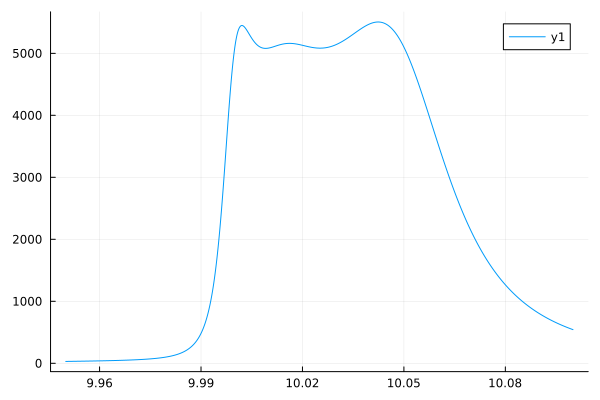

In [56]:
p0 = copy(booster.pos)

plot(freqsplot/1e9,getBoost1d(booster,freqsplot))

In [45]:
move(booster,p0; additive=false)

t0 = copy(booster.timestamp)
O,P,F,s,s_ = dragoon(booster,hist,50e6,5e6,
        obj,UnstuckExpand(2,6_000);
        fmin=10.0e9,fmax=30.0e9,nfreqs=10,
        scalerange=(1.0,1.3),scalesteps=1000,
        preoptimize=false,reverse=false)

t1 = copy(booster.timestamp)

0000-01-01T00:00:56.363

In [46]:
t1-t0

-1463286 milliseconds

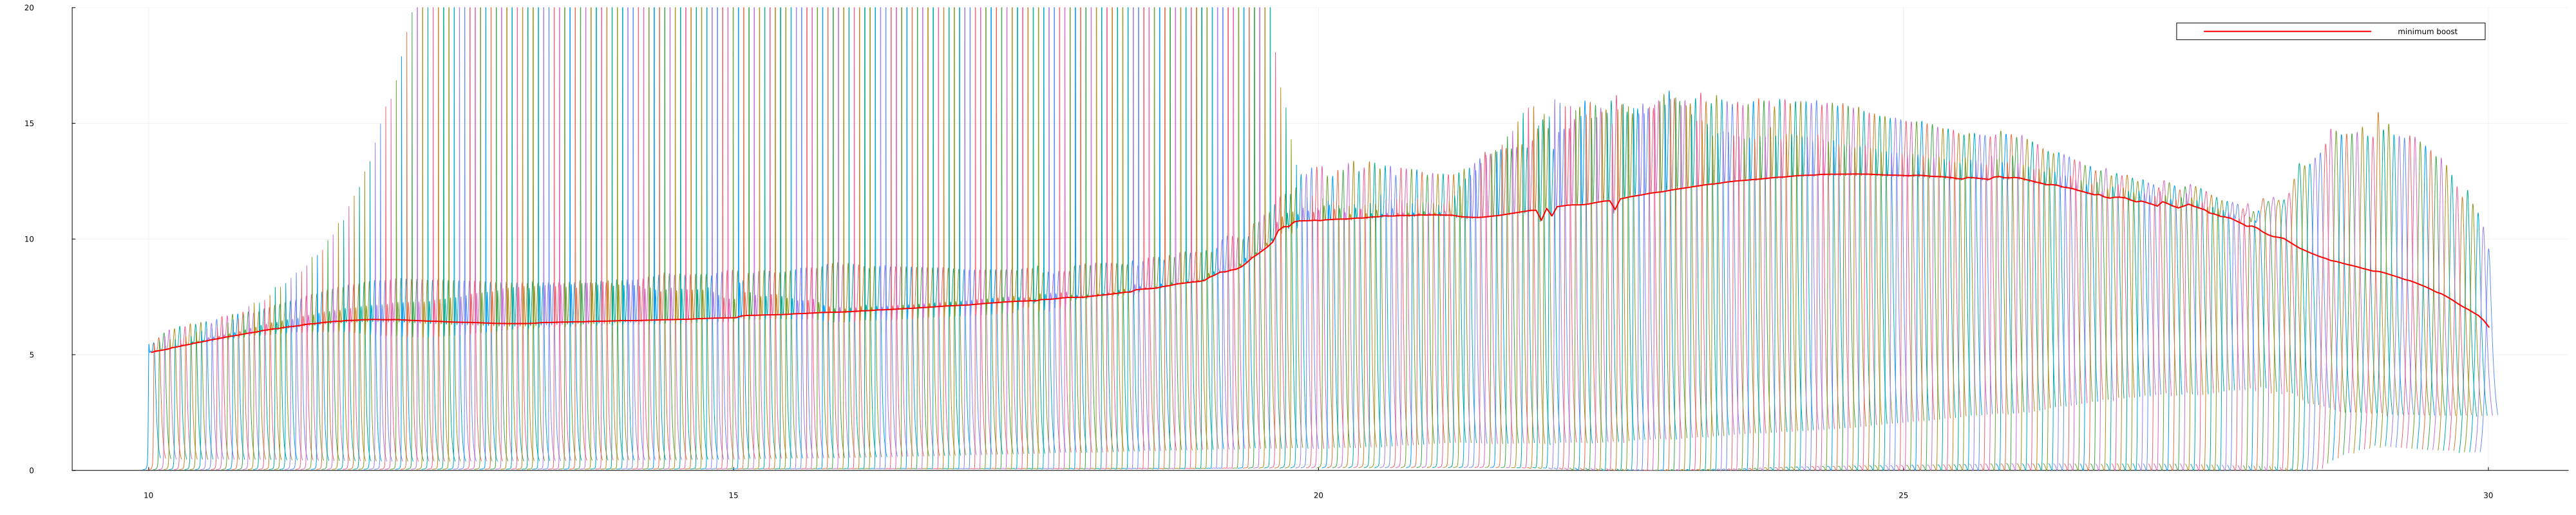

In [53]:
p = plot(; xlabel="Frequency [GHz]",ylabel="Boostfactor β² × 10³",size=(4000,800),
    left_margin=[10mm 0mm],bottom_margin=[10mm 0mm])

f0 = [(f[1]+f[end])/2 for f in F]

for i in eachindex(P)
    bw = F[i][end]-F[i][1]
    f = collect(range(F[i][1]-bw,F[i][end]+bw,100))
    b = boost1d(pos2dist(P[i]),f)
    plot!(p,f/1e9,b/1e3,label="")
end
# xlims!(p,(20-0.1,22+0.1))
ylims!(p,(0,20))

plot!(p,f0/1e9,-O/1e3; c=:red,lw=2,label="minimum boost")
p

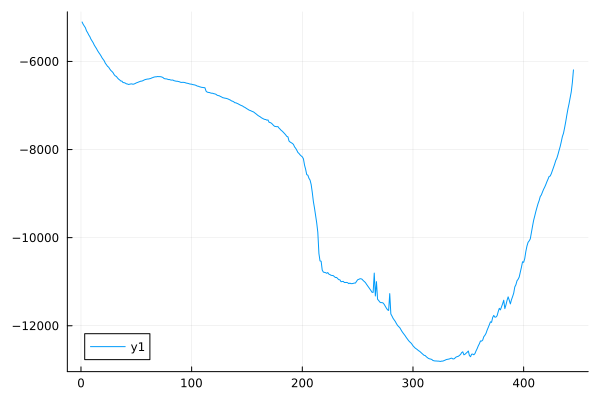

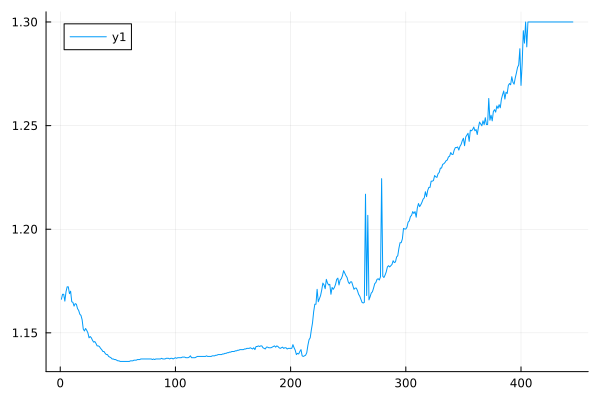

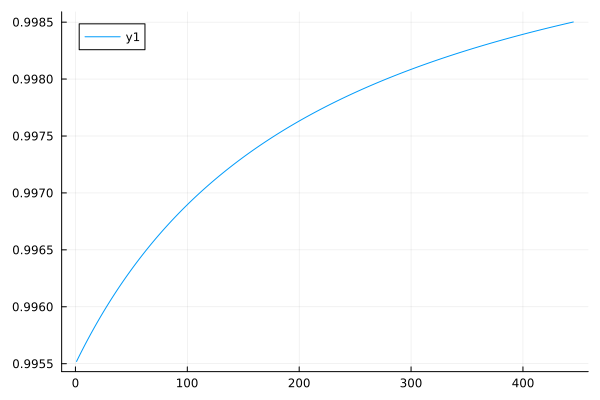

In [49]:
display(plot(O))
display(plot(s_))
display(plot(s))